# 1 Business Understanding

### 1.1 Background
Malaria and typhoid are two of the most common diseases in Ghana, especially in rural and low-income areas. Both cause fever, headache, and body weakness, and they affect many people every year. Because the symptoms are so similar, health workers often find it hard to know which disease a patient has without lab tests. However, many clinics and health centers in rural areas do not have the tools, supplies, or trained staff to run these tests.

As a result, patients are usually treated based on symptoms alone. This leads to wrong treatments, like giving malaria medicine to someone who actually has typhoid, or giving antibiotics to someone with malaria. Wrong treatment can make patients sicker, increase healthcare costs, and lead to drug resistance, which makes future treatments less effective.

### 1.2 Problem Statement
The main problem is that malaria and typhoid are hard to tell apart based on symptoms, and many health facilities lack access to reliable lab tests. This results in misdiagnosis, incorrect treatment, and growing drug resistance. The situation is worse in rural areas where healthcare resources are limited.

### 1.3 Business Goal
The goal is to improve the accuracy of diagnosing malaria and typhoid in primary healthcare settings, especially in rural areas of Ghana. By doing this, we can ensure patients get the right treatment faster, reduce the misuse of drugs, and lower the risk of drug resistance.

### 1.4 Project Objective
This project aims to develop a simple, smart tool using machine learning that can help health workers tell the difference between malaria and typhoid based only on a patient’s symptoms and basic information (like age, location, and fever duration). The tool will work even in clinics without lab testing and can be used on mobile phones or simple computers.

### 1.5 Success Criteria
The project will be considered successful if:

#### Technical Success
* The tool correctly identifies whether a patient has malaria or typhoid at least 85% of the time.

#### Business Success
* It reduces the number of wrong treatments given.
* It helps health centers make faster and more accurate decisions without needing lab tests.








# 2. Data Understanding 

In [17]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.neural_network import MLPClassifier
import joblib
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

# Set style for better visuals
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)



In [18]:
#import dataset
df = pd.read_csv('..\dataset\malaria_typhoid_data.csv')
df.head(20)

,Temperature,Headache,Fatigue,Loss_of_Appetite,Abdominal_Pain,Diarrhea,Anemia,Nausea,Vomiting,Chills,Sweating,Joint_Pain,Cough,Weakness,Weight_Loss,Condition
0,38.0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,Malaria
1,37.4,1,0,0,0,0,1,1,0,1,1,1,0,0,0,Malaria
2,38.1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,Malaria
3,39.0,0,1,0,0,1,1,0,0,0,1,1,1,1,1,Both
4,37.3,0,0,1,0,1,1,0,0,1,0,0,1,0,0,Both
5,37.3,1,1,1,0,1,0,0,1,1,0,0,0,1,0,Malaria
6,39.1,1,0,0,1,1,1,0,1,0,0,0,0,1,0,Both
7,38.3,0,0,0,1,0,1,1,0,1,0,0,1,1,0,Typhoid
8,37.0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,Malaria
9,38.0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,Typhoid


In [19]:
# shape of the dataset
df.shape

(10000, 16)

In [20]:
# data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temperature       10000 non-null  float64
 1   Headache          10000 non-null  int64  
 2   Fatigue           10000 non-null  int64  
 3   Loss_of_Appetite  10000 non-null  int64  
 4   Abdominal_Pain    10000 non-null  int64  
 5   Diarrhea          10000 non-null  int64  
 6   Anemia            10000 non-null  int64  
 7   Nausea            10000 non-null  int64  
 8   Vomiting          10000 non-null  int64  
 9   Chills            10000 non-null  int64  
 10  Sweating          10000 non-null  int64  
 11  Joint_Pain        10000 non-null  int64  
 12  Cough             10000 non-null  int64  
 13  Weakness          10000 non-null  int64  
 14  Weight_Loss       10000 non-null  int64  
 15  Condition         10000 non-null  object 
dtypes: float64(1), int64(14), object(1)
memor

In [21]:
# summary statistics
df.describe()

,Temperature,Headache,Fatigue,Loss_of_Appetite,Abdominal_Pain,Diarrhea,Anemia,Nausea,Vomiting,Chills,Sweating,Joint_Pain,Cough,Weakness,Weight_Loss
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,37.497830,0.508200,0.492000,0.491300,0.511000,0.508500,0.493800,0.499700,0.503100,0.507300,0.503200,0.498900,0.491900,0.496500,0.503100
std,1.004104,0.499958,0.499961,0.499949,0.499904,0.499953,0.499987,0.500025,0.500015,0.499972,0.500015,0.500024,0.499959,0.500013,0.500015
min,33.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.500000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,38.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,41.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
#missing values
df.isnull().sum()
df.isnull().sum().sum()

np.int64(0)

In [23]:
# checking for duplicates
print("Duplicates:",df.duplicated().sum())

Duplicates: 43


### Insights from Data Assessment and Quality Checks

#### 1. Dataset Size

* Rows: 10,000

* Columns: 16

#### 2. Feature Types

* 1 float64 feature → Temperature (continuous, numeric)

* 14 int64 features → symptoms (mostly binary: 0 = No, 1 = Yes)

* 1 object feature → Condition (target variable, categorical)

Predictors are all numeric; only target is categorical → good for ML models.

#### 3. Data Completeness

* No missing values (10,000 non-null in all columns).

* No NaNs detected, but best to confirm with df.isnull().sum().sum().

#### 4. Feature Distribution (from df.describe())

#####  Temperature:

* Range: 33.6°C – 41.4°C

* Mean: 37.5°C, Std: ~1.0

* Typical human body temp is 36.5–37.5°C → values above 38°C indicate fever.

#####  Symptoms (binary features):

* Mean values are ~0.49–0.51 → symptoms are almost evenly distributed (≈50% of patients report each symptom).

* 25%, 50%, 75% quantiles → confirm binary encoding (0 or 1).

Key Features for Diagnosis

* Malaria indicators: High fever, chills, sweating, anemia, joint pain.

* Typhoid indicators: Abdominal pain, diarrhea, vomiting, weight loss, weakness.

Condition column = target (disease label).

# Target Variable Analysis

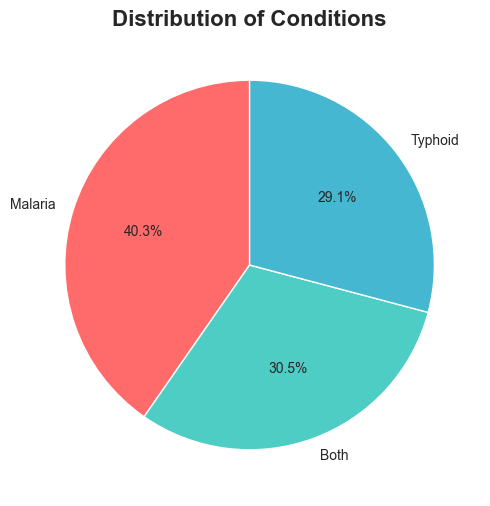

Class distribution:
Condition
Malaria    4033
Both       3054
Typhoid    2913
Name: count, dtype: int64

Class balance ratio: 0.722


In [24]:
# Target distribution
plt.figure(figsize=(10, 6))
target_counts = df['Condition'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Distribution of Conditions', fontsize=16, fontweight='bold')
plt.show()

print("Class distribution:")
print(target_counts)
print(f"\nClass balance ratio: {target_counts.min()/target_counts.max():.3f}")

#### Insight

The target variable shows a relatively balanced distribution with:

* Malaria: 40.3%

* Typhoid: 29.1%

* Both: 30.5%


### Temperature Analysis by Condition

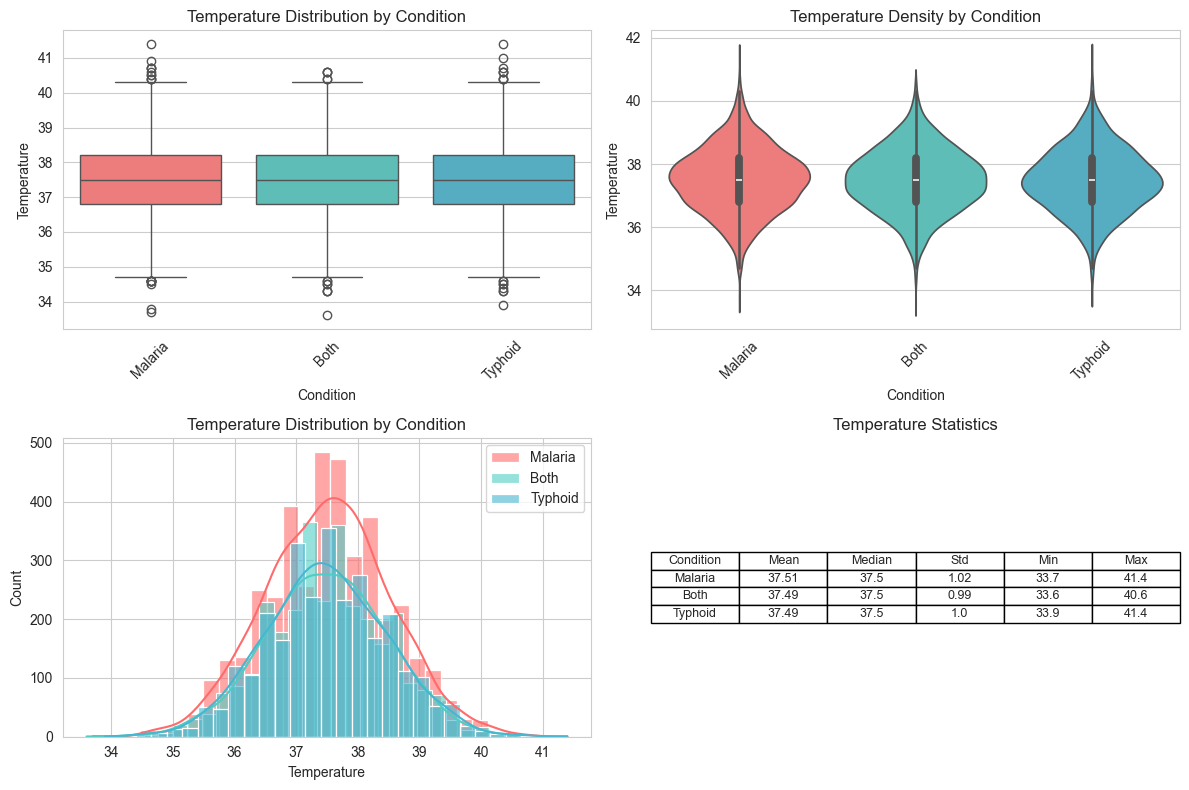


ANOVA test for temperature across conditions:
F-statistic: 0.616, p-value: 5.4035e-01


In [25]:
# Temperature distribution by condition
plt.figure(figsize=(12, 8))

# Box plot
plt.subplot(2, 2, 1)
sns.boxplot(x='Condition', y='Temperature', data=df, palette=colors)
plt.title('Temperature Distribution by Condition')
plt.xticks(rotation=45)

# Violin plot
plt.subplot(2, 2, 2)
sns.violinplot(x='Condition', y='Temperature', data=df, palette=colors)
plt.title('Temperature Density by Condition')
plt.xticks(rotation=45)

# Histogram
plt.subplot(2, 2, 3)
for condition, color in zip(df['Condition'].unique(), colors):
    subset = df[df['Condition'] == condition]
    sns.histplot(subset['Temperature'], kde=True, label=condition, 
                 color=color, alpha=0.6, bins=30)
plt.title('Temperature Distribution by Condition')
plt.legend()

# Statistical summary
plt.subplot(2, 2, 4)
stats_data = []
for condition in df['Condition'].unique():
    temp_data = df[df['Condition'] == condition]['Temperature']
    stats_data.append({
        'Condition': condition,
        'Mean': temp_data.mean(),
        'Median': temp_data.median(),
        'Std': temp_data.std(),
        'Min': temp_data.min(),
        'Max': temp_data.max()
    })
stats_df = pd.DataFrame(stats_data)
plt.table(cellText=stats_df.round(2).values,
          colLabels=stats_df.columns,
          cellLoc='center',
          loc='center')
plt.axis('off')
plt.title('Temperature Statistics')

plt.tight_layout()
plt.show()

# ANOVA test for temperature differences
groups = [df[df['Condition'] == condition]['Temperature'] for condition in df['Condition'].unique()]
f_stat, p_value = stats.f_oneway(*groups)
print(f"\nANOVA test for temperature across conditions:")
print(f"F-statistic: {f_stat:.3f}, p-value: {p_value:.4e}")

### Symptom Prevalence Analysis

<Figure size 1600x1000 with 0 Axes>

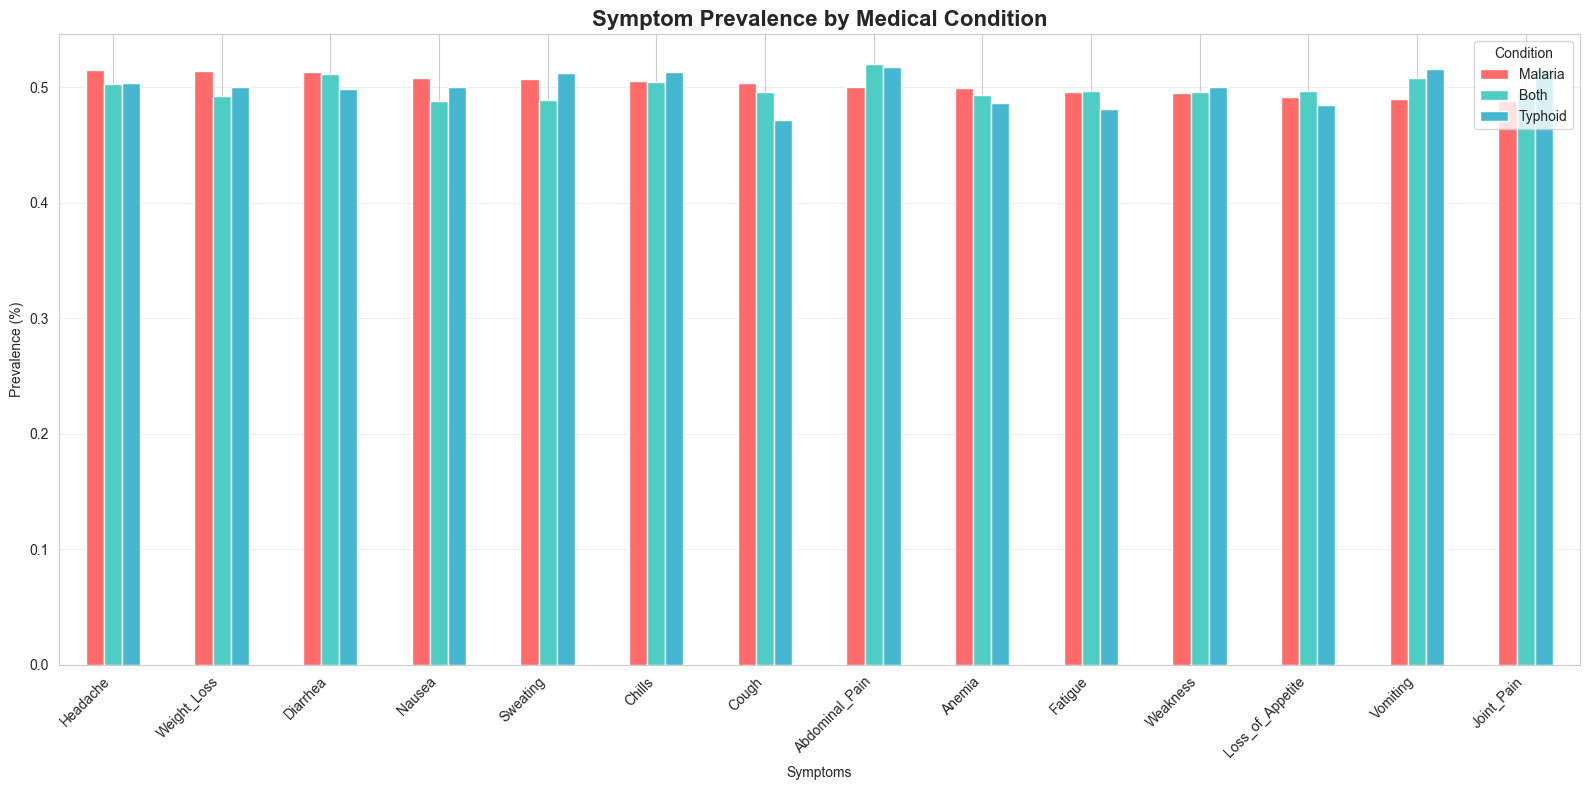

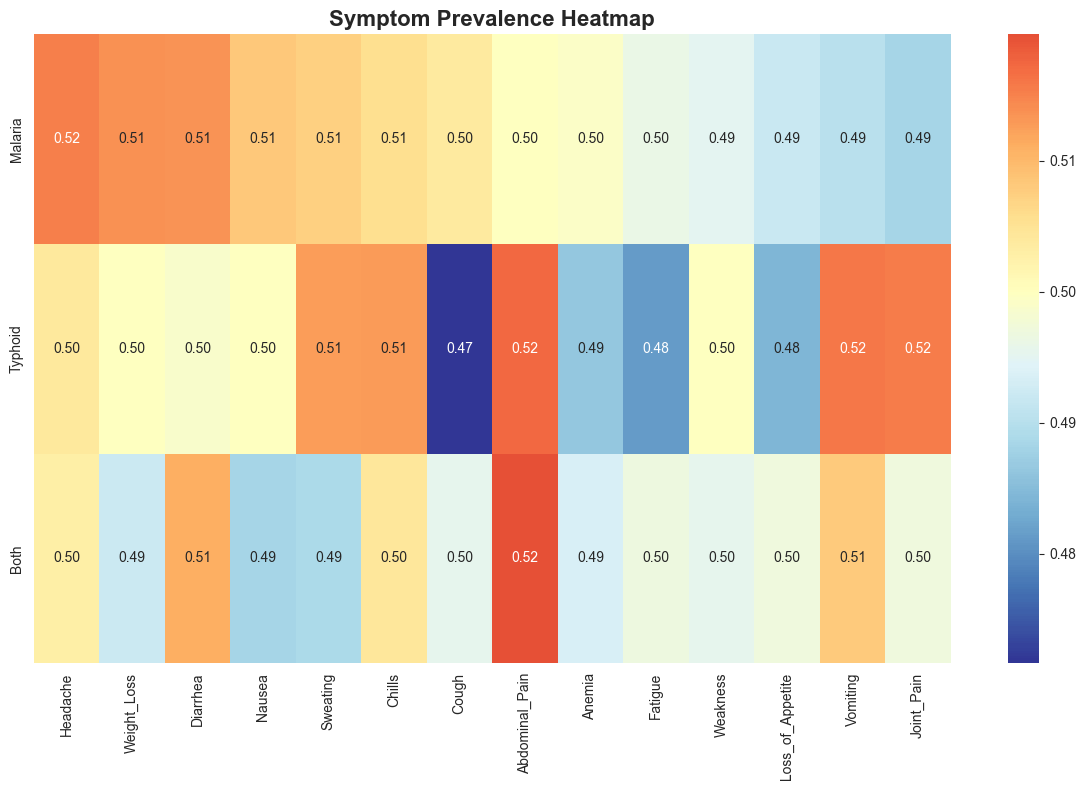

In [26]:
# Symptom columns (all except Temperature and Condition)
symptom_columns = [col for col in df.columns if col not in ['Temperature', 'Condition']]

# Symptom prevalence by condition
plt.figure(figsize=(16, 10))

symptom_prevalence = pd.DataFrame()
for condition in df['Condition'].unique():
    condition_data = df[df['Condition'] == condition]
    prevalence = condition_data[symptom_columns].mean().sort_values(ascending=False)
    symptom_prevalence[condition] = prevalence

# Plot symptom prevalence
symptom_prevalence.plot(kind='bar', figsize=(16, 8), color=colors)
plt.title('Symptom Prevalence by Medical Condition', fontsize=16, fontweight='bold')
plt.xlabel('Symptoms')
plt.ylabel('Prevalence (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Condition')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Heatmap of symptom differences
plt.figure(figsize=(12, 8))
symptom_diff = symptom_prevalence.copy()
symptom_diff['Malaria_vs_Typhoid'] = symptom_prevalence['Malaria'] - symptom_prevalence['Typhoid']
symptom_diff['Both_vs_Avg'] = symptom_prevalence['Both'] - (symptom_prevalence['Malaria'] + symptom_prevalence['Typhoid'])/2

sns.heatmap(symptom_diff[['Malaria', 'Typhoid', 'Both']].T, 
            annot=True, fmt='.2f', cmap='RdYlBu_r', center=0.5)
plt.title('Symptom Prevalence Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Correlation Analysis

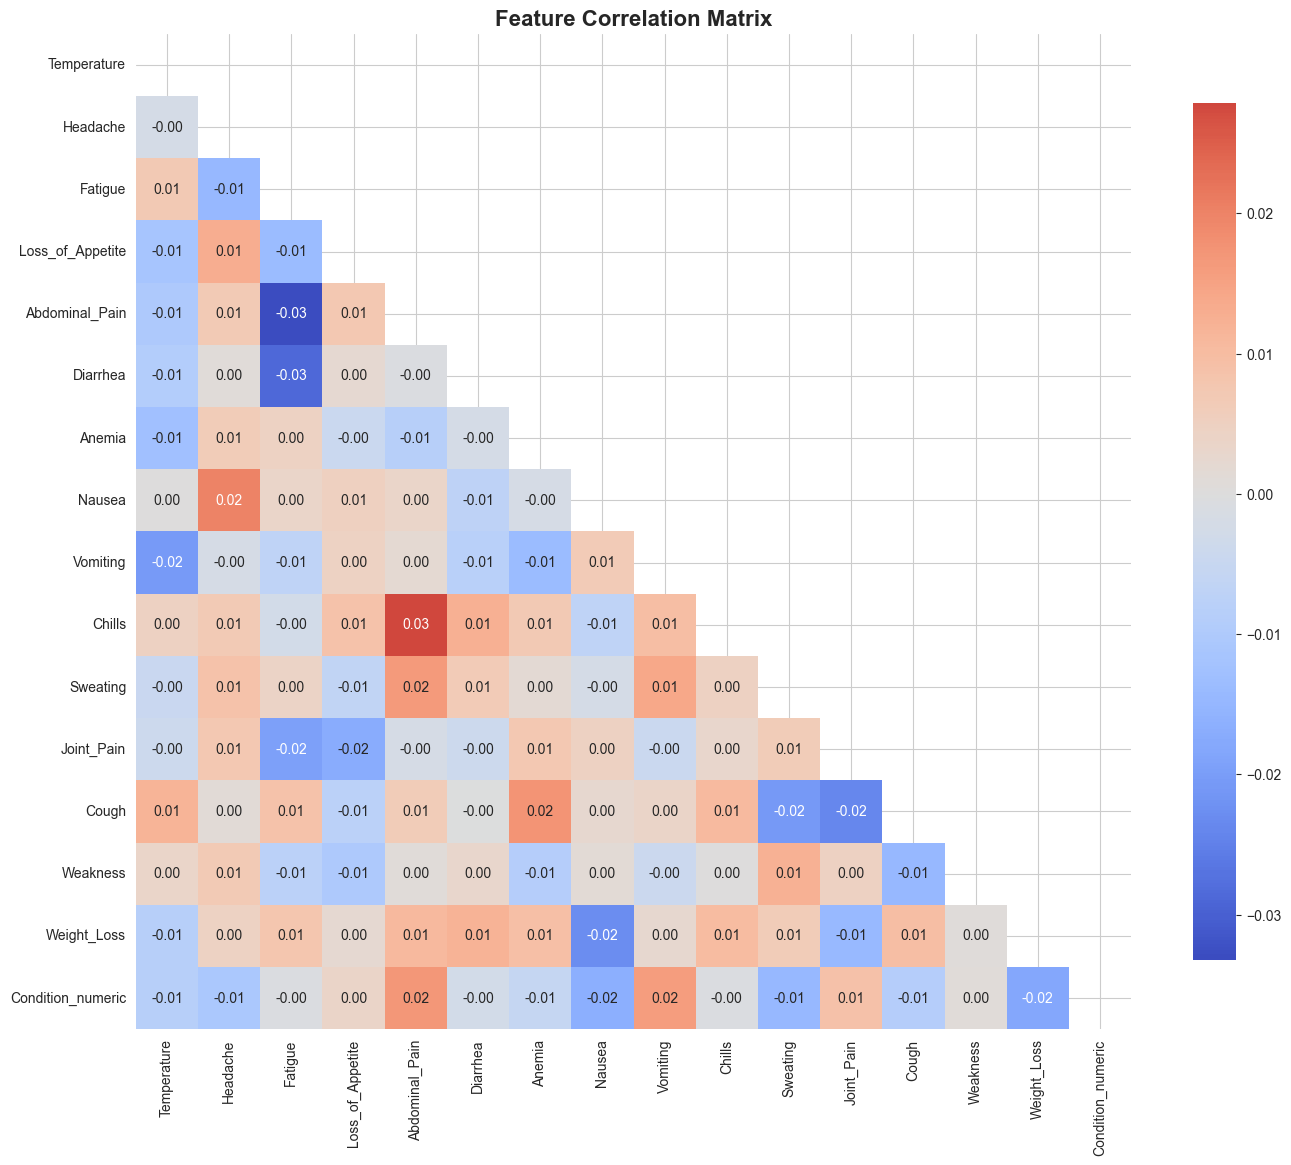

Top features correlated with target:
Weight_Loss      -0.018291
Abdominal_Pain    0.017051
Nausea           -0.016694
Vomiting          0.015915
Sweating         -0.014440
Headache         -0.010639
Cough            -0.008954
Joint_Pain        0.008952
Temperature      -0.008555
Anemia           -0.005638
Name: Condition_numeric, dtype: float64


In [27]:
# Correlation matrix
plt.figure(figsize=(14, 12))

# copy of correlation analysis
df_numeric = df.copy()

# Convert condition to numerical for correlation
condition_map = {'Malaria': 0, 'Typhoid': 1, 'Both': 2}
df_numeric['Condition_numeric'] = df['Condition'].map(condition_map)

# Dropping the original string column
#corr_matrix = df_numeric.corr()

# Calculate correlation matrix
corr_matrix = df_numeric.corr(numeric_only=True)

# Plot heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Top correlations with target
target_correlations = corr_matrix['Condition_numeric'].drop('Condition_numeric').sort_values(key=abs, ascending=False)
print("Top features correlated with target:")
print(target_correlations.head(10))

### Multivariate Analysis - PCA

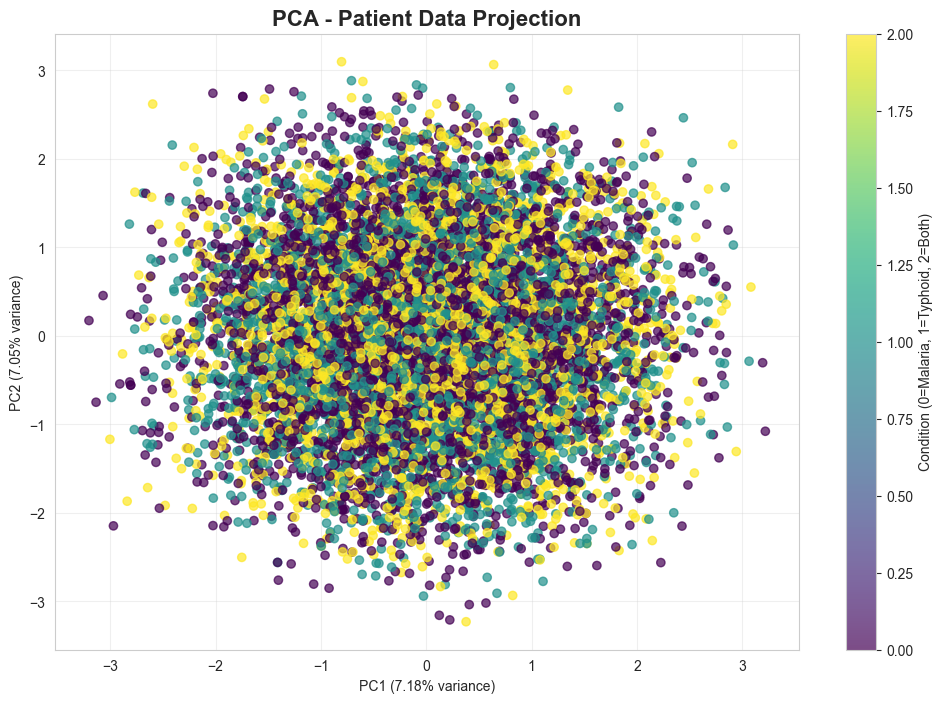

Total variance explained by first 2 components: 14.23%


In [28]:
# Prepare data for PCA
X = df_numeric.drop(['Condition', 'Condition_numeric'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA results
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=df_numeric['Condition_numeric'], 
                     cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Condition (0=Malaria, 1=Typhoid, 2=Both)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA - Patient Data Projection', fontsize=16, fontweight='bold')
plt.grid(alpha=0.3)
plt.show()

print(f"Total variance explained by first 2 components: {pca.explained_variance_ratio_.sum():.2%}")

### System Pattern Analysis

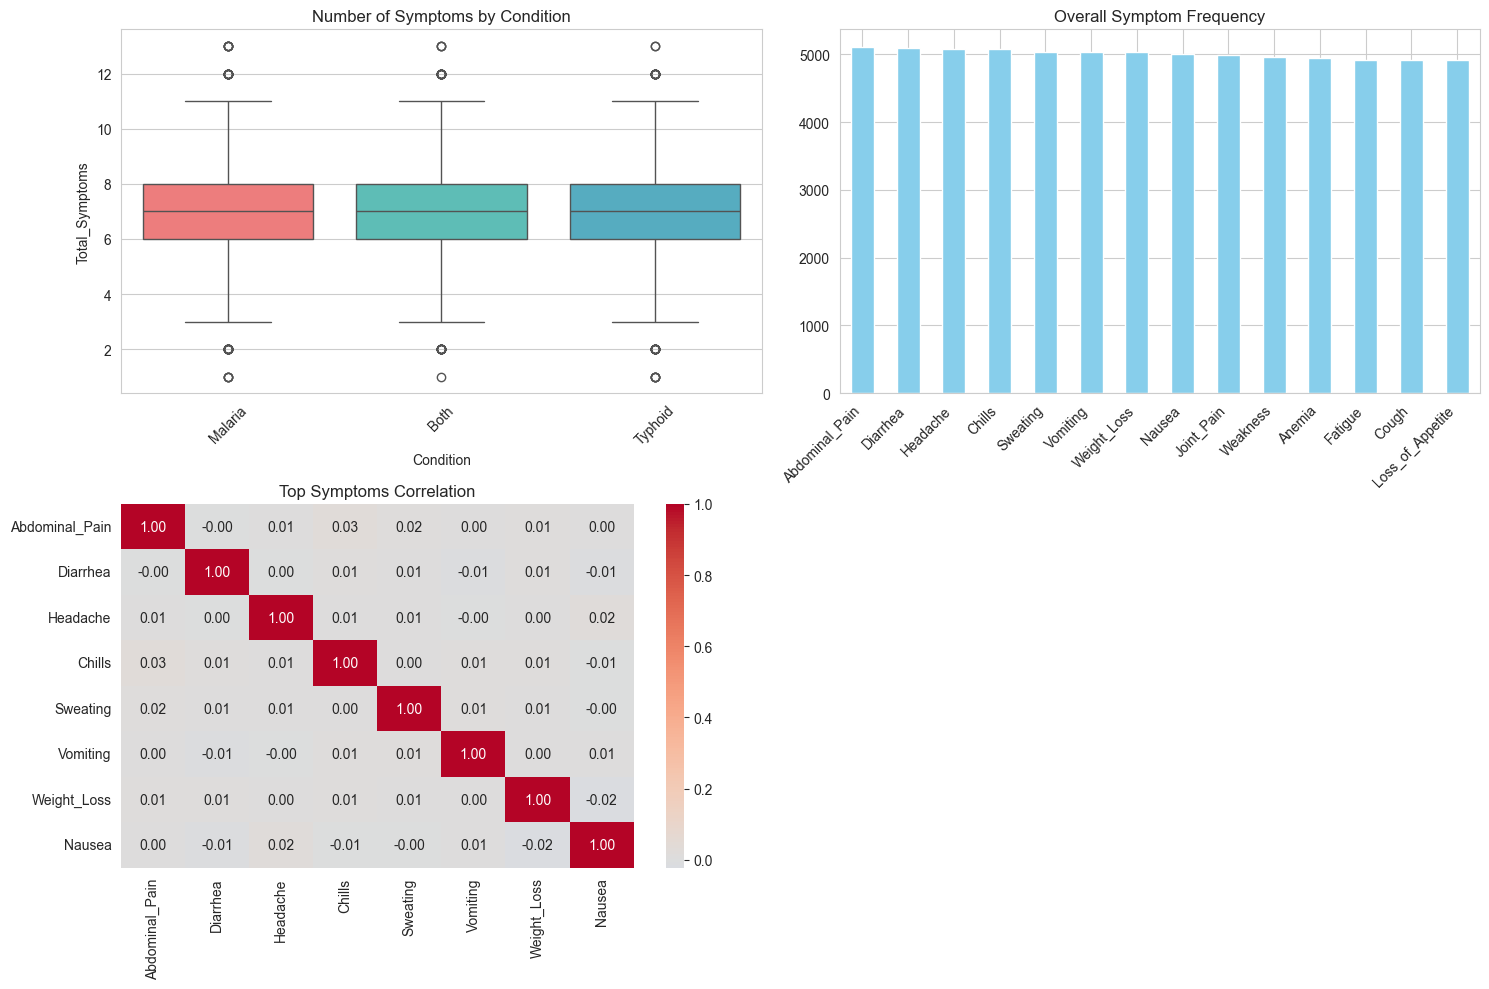

In [29]:
# Analyze symptom combinations
plt.figure(figsize=(15, 10))

# Total symptoms per patient
df['Total_Symptoms'] = df[symptom_columns].sum(axis=1)

plt.subplot(2, 2, 1)
sns.boxplot(x='Condition', y='Total_Symptoms', data=df, palette=colors)
plt.title('Number of Symptoms by Condition')
plt.xticks(rotation=45)

# Most common symptom combinations
from mlxtend.frequent_patterns import apriori, association_rules

# Convert to boolean for association rules
df_bool = df[symptom_columns].astype(bool)

plt.subplot(2, 2, 2)
symptom_counts = df[symptom_columns].sum().sort_values(ascending=False)
symptom_counts.plot(kind='bar', color='skyblue')
plt.title('Overall Symptom Frequency')
plt.xticks(rotation=45, ha='right')

# Symptom correlation network (simplified)
plt.subplot(2, 2, 3)
top_symptoms = symptom_counts.head(8).index
top_corr = df[top_symptoms].corr()
sns.heatmap(top_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Top Symptoms Correlation')

plt.tight_layout()
plt.show()

### Statistical Test

In [30]:
# Chi-square tests for each symptom
print("Chi-square tests for symptom prevalence across conditions:")
print("=" * 60)

results = []
for symptom in symptom_columns:
    contingency_table = pd.crosstab(df[symptom], df['Condition'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    results.append({
        'Symptom': symptom,
        'Chi2': chi2,
        'p_value': p_value,
        'Significant': p_value < 0.05
    })

results_df = pd.DataFrame(results).sort_values('p_value')
print(results_df.head(10))

# Effect size for significant symptoms
print("\nTop symptoms with largest effect size (Cramér's V):")
for _, row in results_df[results_df['Significant']].head(5).iterrows():
    contingency_table = pd.crosstab(df[row['Symptom']], df['Condition'])
    n = contingency_table.sum().sum()
    chi2 = row['Chi2']
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    print(f"{row['Symptom']}: Cramér's V = {cramers_v:.3f}")

Chi-square tests for symptom prevalence across conditions:
           Symptom      Chi2   p_value  Significant
11           Cough  7.218526  0.027072         True
10      Joint_Pain  5.138277  0.076601        False
7         Vomiting  4.886796  0.086865        False
9         Sweating  3.797150  0.149782        False
13     Weight_Loss  3.425541  0.180365        False
3   Abdominal_Pain  3.378899  0.184621        False
6           Nausea  2.807257  0.245704        False
1          Fatigue  1.888356  0.388999        False
4         Diarrhea  1.587306  0.452190        False
0         Headache  1.349755  0.509219        False

Top symptoms with largest effect size (Cramér's V):
Cough: Cramér's V = 0.027


#### Temperature Symptom Interactions

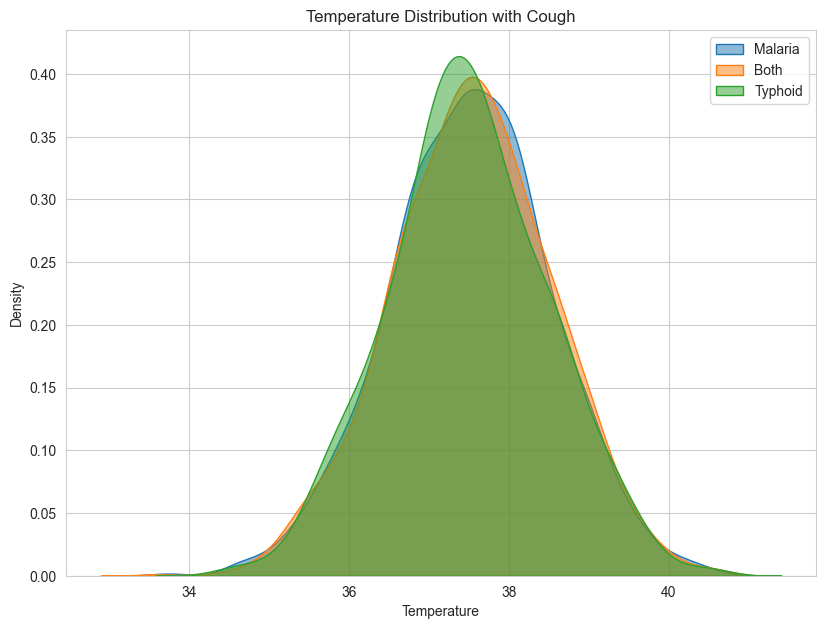

In [31]:
# Analyze temperature patterns with specific symptoms
plt.figure(figsize=(16, 12))

significant_symptoms = results_df[results_df['Significant']].head(4)['Symptom'].tolist()

for i, symptom in enumerate(significant_symptoms, 1):
    plt.subplot(2, 2, i)
    for condition in df['Condition'].unique():
        subset = df[(df['Condition'] == condition) & (df[symptom] == 1)]
        sns.kdeplot(subset['Temperature'], label=condition, fill=True, alpha=0.5)
    plt.title(f'Temperature Distribution with {symptom}')
    plt.legend()

plt.tight_layout()
plt.show()

# 3. Data Preparation

In [32]:
# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['Condition'])

# Storing mapping for reference
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class mapping:", class_mapping)

Class mapping: {'Both': np.int64(0), 'Malaria': np.int64(1), 'Typhoid': np.int64(2)}


In [33]:
X = df.drop('Condition', axis=1)
y = y_encoded  # Use encoded target

# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Class distribution in training set: {np.bincount(y_train)}")
print(f"Class distribution in test set: {np.bincount(y_test)}")

# 4. Scale the temperature feature (only continuous feature)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled['Temperature'] = scaler.fit_transform(X_train[['Temperature']])
X_test_scaled['Temperature'] = scaler.transform(X_test[['Temperature']])

# Also create a version without scaling for tree-based models
X_train_base = X_train.copy()
X_test_base = X_test.copy()

Training set shape: (8000, 16)
Test set shape: (2000, 16)
Class distribution in training set: [2443 3226 2331]
Class distribution in test set: [611 807 582]


In [34]:
# models with encoding handling
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='mlogloss'),
    'LightGBM': LGBMClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'Neural Network': MLPClassifier(random_state=42, max_iter=1000)
}


In [35]:
# cross-validation evaluation
results = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Cross-validation results:")
print("=" * 50)

for name, model in models.items():
    if name in ['Logistic Regression', 'SVM', 'Neural Network']:
        # Use scaled data for these models
        X_data = X_train_scaled
    else:
        # Use unscaled data for tree-based models
        X_data = X_train_base
    
    scores = cross_val_score(model, X_data, y_train, cv=cv, scoring='accuracy')
    results[name] = scores
    print(f"{name:20s}: {scores.mean():.4f} ± {scores.std():.4f}")

Cross-validation results:
Logistic Regression : 0.3991 ± 0.0023
Random Forest       : 0.3516 ± 0.0134
Gradient Boosting   : 0.3866 ± 0.0033
XGBoost             : 0.3458 ± 0.0069
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 107
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 16
[LightGBM] [Info] Start training from score -1.185908
[LightGBM] [Info] Start training from score -0.908121
[LightGBM] [Info] Start training from score -1.233573
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 106
[LightGBM] [Info] Number of data points in the tra

# Train and Evaluate Models


--------------------------------------------------
Training and evaluating XGBoost
--------------------------------------------------
Accuracy: 0.3580
F1 Score: 0.3401

Classification Report:
              precision    recall  f1-score   support

        Both       0.29      0.21      0.24       611
     Malaria       0.41      0.57      0.47       807
     Typhoid       0.29      0.23      0.26       582

    accuracy                           0.36      2000
   macro avg       0.33      0.33      0.32      2000
weighted avg       0.34      0.36      0.34      2000



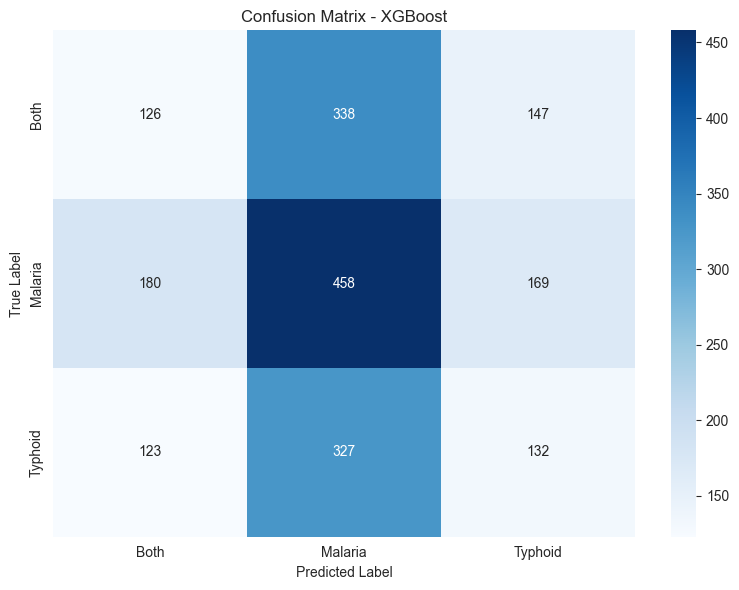


--------------------------------------------------
Training and evaluating Random Forest
--------------------------------------------------
Accuracy: 0.3670
F1 Score: 0.3549

Classification Report:
              precision    recall  f1-score   support

        Both       0.32      0.26      0.29       611
     Malaria       0.41      0.54      0.47       807
     Typhoid       0.32      0.24      0.27       582

    accuracy                           0.37      2000
   macro avg       0.35      0.35      0.34      2000
weighted avg       0.36      0.37      0.35      2000



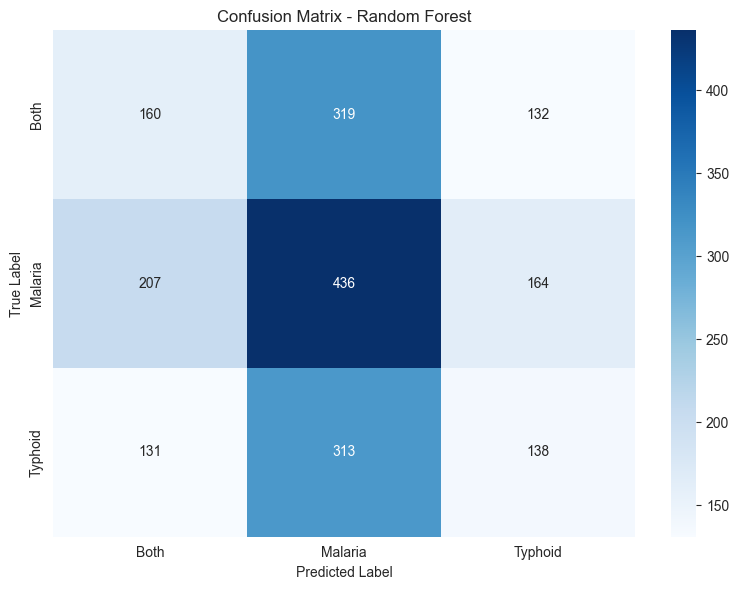


--------------------------------------------------
Training and evaluating LightGBM
--------------------------------------------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 107
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 16
[LightGBM] [Info] Start training from score -1.186215
[LightGBM] [Info] Start training from score -0.908199
[LightGBM] [Info] Start training from score -1.233144
Accuracy: 0.3700
F1 Score: 0.3285

Classification Report:
              precision    recall  f1-score   support

        Both       0.29      0.16      0.21       611
     Malaria       0.41      0.68      0.51       807
     Typhoid       0.29      0.16      0.21       582

    accuracy                           0.37      2000
   macro avg       0.

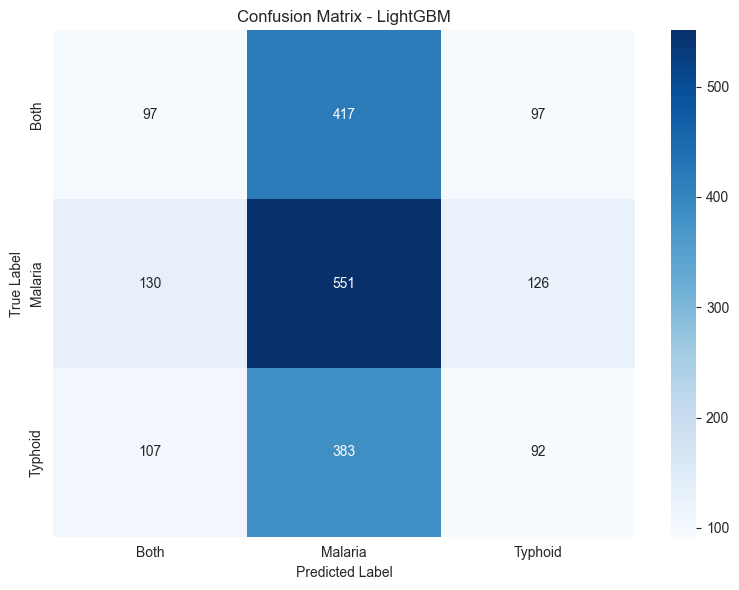

In [36]:
best_models = {
    'XGBoost': XGBClassifier(random_state=42, eval_metric='mlogloss'),
    'Random Forest': RandomForestClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

final_results = {}

for name, model in best_models.items():
    print(f"\n{'-'*50}")
    print(f"Training and evaluating {name}")
    print(f"{'-'*50}")
    
    # Train the model
    model.fit(X_train_base, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_base)
    y_pred_proba = model.predict_proba(X_test_base)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    final_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'f1_score': f1,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    
    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()
    

### Feature Importance Analysis


Feature Importance Analysis for LightGBM:


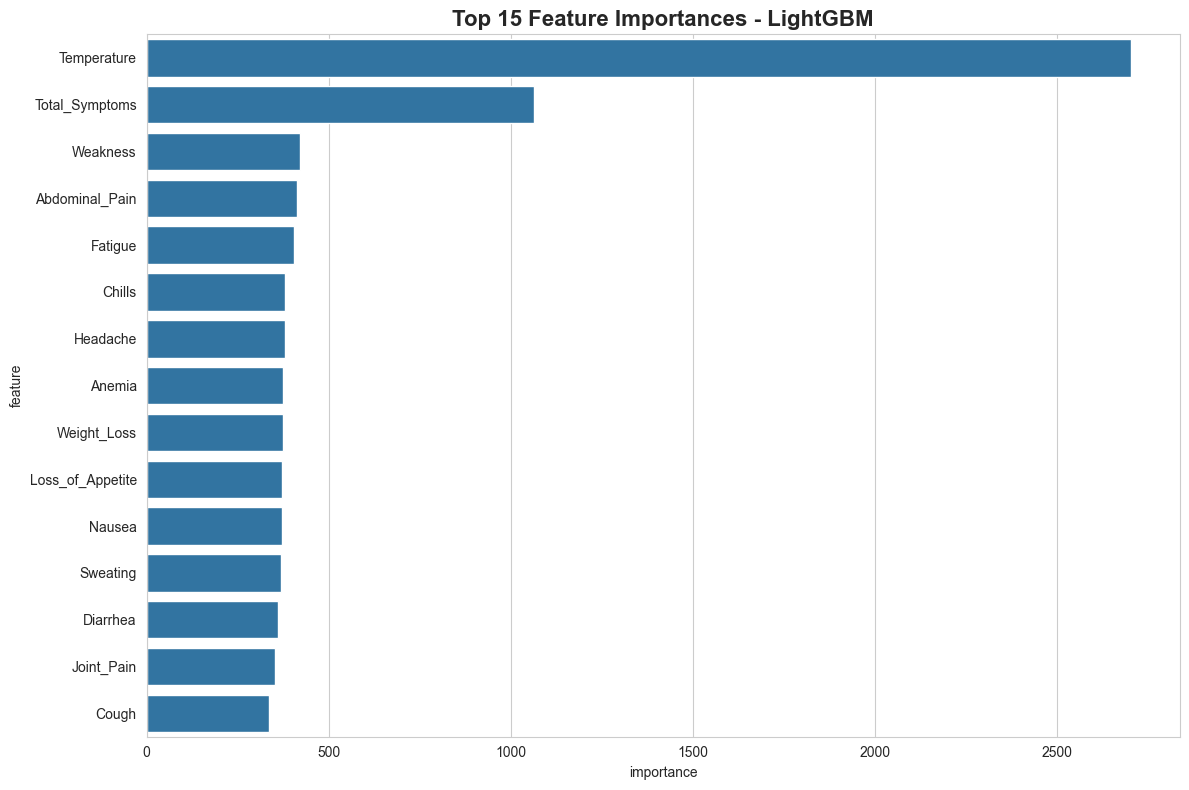

Top 10 most important features:
             feature  importance
0        Temperature        2702
15    Total_Symptoms        1063
13          Weakness         420
4     Abdominal_Pain         412
2            Fatigue         406
9             Chills         381
1           Headache         379
6             Anemia         374
14       Weight_Loss         374
3   Loss_of_Appetite         372


In [37]:
best_model_name = max(final_results.items(), key=lambda x: x[1]['accuracy'])[0]
best_model = final_results[best_model_name]['model']

print(f"\nFeature Importance Analysis for {best_model_name}:")
print("=" * 50)

if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
    plt.title(f'Top 15 Feature Importances - {best_model_name}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print("Top 10 most important features:")
    print(feature_importance.head(10))

#### Hyperparameter Tuning for Best Model 

In [38]:
print(f"\nHyperparameter Tuning for {best_model_name}:")
print("=" * 50)

if best_model_name == 'XGBoost':
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0]
    }
elif best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
else:  # LightGBM
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1],
        'num_leaves': [31, 50]
    }

grid_search = GridSearchCV(
    best_models[best_model_name], 
    param_grid, 
    cv=3, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_base, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Evaluate tuned model
tuned_model = grid_search.best_estimator_
y_pred_tuned = tuned_model.predict(X_test_base)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

print(f"Tuned model accuracy: {accuracy_tuned:.4f}")
print("\nClassification Report for Tuned Model:")
print(classification_report(y_test, y_pred_tuned, target_names=label_encoder.classes_))

# Update final results
final_results['Tuned_' + best_model_name] = {
    'model': tuned_model,
    'accuracy': accuracy_tuned,
    'predictions': y_pred_tuned
}


Hyperparameter Tuning for LightGBM:
Fitting 3 folds for each of 24 candidates, totalling 72 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 107
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 16
[LightGBM] [Info] Start training from score -1.186215
[LightGBM] [Info] Start training from score -0.908199
[LightGBM] [Info] Start training from score -1.233144
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

# Final Model Comparison


Final Model Comparison:
            Model  Accuracy  F1_Score
3  Tuned_LightGBM     0.404  0.233252
2        LightGBM     0.370  0.328459
1   Random Forest     0.367  0.354857
0         XGBoost     0.358  0.340117


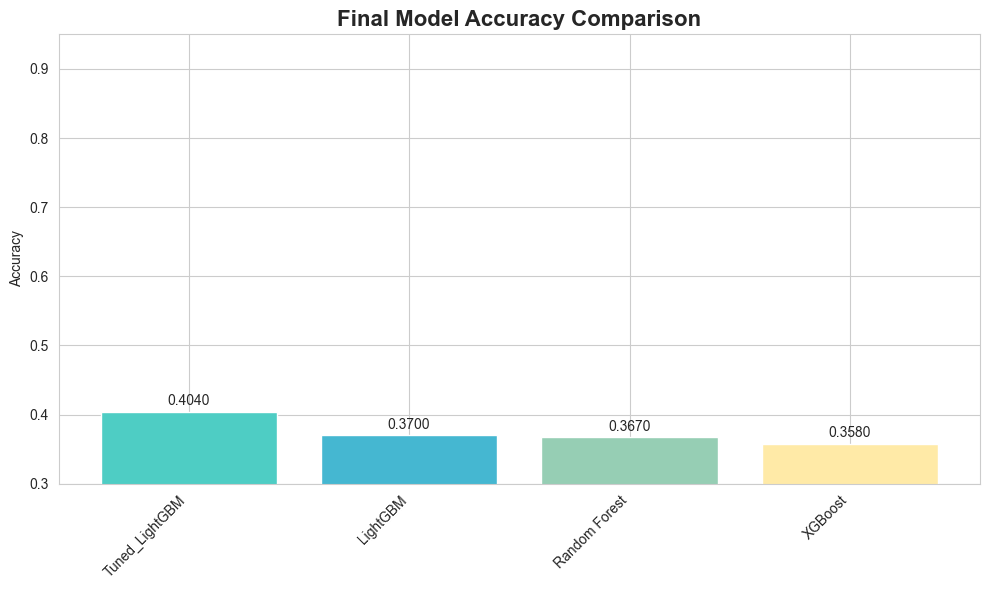

In [41]:
# Compare all models
print("\nFinal Model Comparison:")
print("=" * 50)

comparison_data = []
for name, result in final_results.items():
    comparison_data.append({
        'Model': name,
        'Accuracy': result['accuracy'],
        'F1_Score': result.get('f1_score', f1_score(y_test, result['predictions'], average='weighted'))
    })

comparison_df = pd.DataFrame(comparison_data).sort_values('Accuracy', ascending=False)
print(comparison_df)

# Plot final comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(comparison_df['Model'], comparison_df['Accuracy'], 
               color=['#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
plt.title('Final Model Accuracy Comparison', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.3, 0.95)

# Add value labels
for bar, accuracy in zip(bars, comparison_df['Accuracy']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{accuracy:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()